## 6. Linear Regression with PyTorch

### 1. About Linear Regression

In [25]:
import numpy as np
import matplotlib.pyplot as plt

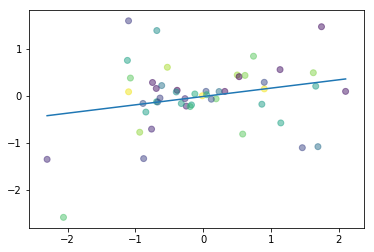

In [2]:
np.random.seed(1)
n = 50
x = np.random.randn(n)
y = x * np.random.randn(n)
colors = np.random.rand(n)

plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))(np.unique(x)))

plt.scatter(x, y, c=colors, alpha=0.5)
plt.show()

### 2. Building Linear Regression model with PyTorch

** Toy Dataset **

In [3]:
x_values = [i for i in range(11)]

In [4]:
x_values

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

In [5]:
# Convert to numpy
x_train = np.array(x_values, dtype=np.float32)
x_train.shape

(11,)

In [6]:
## Important : 2D shape required
x_train = x_train.reshape(-1, 1)
x_train.shape

(11, 1)

In [7]:
y_values = [2*i + 1 for i in x_values]

In [8]:
y_values = np.array(y_values, dtype=np.float32)

In [9]:
y_train = y_values.reshape(-1, 1)

In [10]:
y_train.shape

(11, 1)

### Building Model

In [11]:
import torch
import torch.nn as nn
from torch.autograd import Variable

In [12]:
class LinearRegressionModel(nn.Module):
    def __init__(self, input_size, output_size):
        super(LinearRegressionModel, self).__init__()
        self.linear = nn.Linear(input_size, output_size)
    
    def forward(self, x):
        out = self.linear(x)
        return out

** Instantiate model class **

In [13]:
input_dim = 1
output_dim = 1

model = LinearRegressionModel(input_dim, output_dim)

In [14]:
list(model.parameters())

[Parameter containing:
 1.00000e-02 *
  -6.6672
 [torch.FloatTensor of size 1x1], Parameter containing:
 -0.6919
 [torch.FloatTensor of size 1]]

In [15]:
criterion = nn.MSELoss()

In [16]:
learning_rate = 0.01
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

** Train Model **

In [17]:
epochs = 100

In [18]:
for epoch in range(epochs):
    epoch += 1
    # Convert numpy array to torch variables for gradient collection
    inputs = Variable(torch.from_numpy(x_train))
    labels = Variable(torch.from_numpy(y_train))
    
    # Clear gradients w.r.t parameters (collected in previous epoch)
    optimizer.zero_grad()
    
    # Forward to get output, calling the model directly runs the forward function
    outputs = model(inputs)
    
    # Calculate loss
    loss = criterion(outputs, labels)
    
    # Getting Gradients w.r.t. parameters
    loss.backward()
    
    # Updating Parameters
    optimizer.step()
    
    print('epoch {}, loss {}'.format(epoch, loss.data[0]))

epoch 1, loss 187.3180694580078
epoch 2, loss 15.762677192687988
epoch 3, loss 1.7640420198440552
epoch 4, loss 0.616875410079956
epoch 5, loss 0.518022894859314
epoch 6, loss 0.504737138748169
epoch 7, loss 0.4984892010688782
epoch 8, loss 0.49287253618240356
epoch 9, loss 0.4873647391796112
epoch 10, loss 0.4819222390651703
epoch 11, loss 0.4765404760837555
epoch 12, loss 0.4712190330028534
epoch 13, loss 0.46595698595046997
epoch 14, loss 0.46075335144996643
epoch 15, loss 0.4556084871292114
epoch 16, loss 0.45052096247673035
epoch 17, loss 0.44549015164375305
epoch 18, loss 0.44051530957221985
epoch 19, loss 0.4355961084365845
epoch 20, loss 0.4307316839694977
epoch 21, loss 0.4259217083454132
epoch 22, loss 0.4211656451225281
epoch 23, loss 0.41646289825439453
epoch 24, loss 0.41181179881095886
epoch 25, loss 0.4072131812572479
epoch 26, loss 0.40266627073287964
epoch 27, loss 0.3981693983078003
epoch 28, loss 0.39372339844703674
epoch 29, loss 0.38932639360427856
epoch 30, loss 0

** Compare Data **

In [19]:
predicted = model(Variable(torch.from_numpy(x_train))).data.numpy()

In [20]:
predicted

array([[ 0.22091569],
       [ 2.3331108 ],
       [ 4.445306  ],
       [ 6.557501  ],
       [ 8.669696  ],
       [10.781891  ],
       [12.894086  ],
       [15.006281  ],
       [17.118475  ],
       [19.230669  ],
       [21.342865  ]], dtype=float32)

In [21]:
y_train

array([[ 1.],
       [ 3.],
       [ 5.],
       [ 7.],
       [ 9.],
       [11.],
       [13.],
       [15.],
       [17.],
       [19.],
       [21.]], dtype=float32)

** Plot Graph **

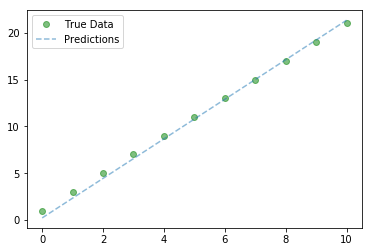

In [22]:
# clear figure
plt.clf()

# plot true data
plt.plot(x_train, y_train, 'go', label = 'True Data', alpha = 0.5)

# plot predictions
plt.plot(x_train, predicted, '--', label = 'Predictions', alpha = 0.5)

# legend and plot
plt.legend(loc='best')
plt.show()

** Save Model **

In [23]:
save_model = False
if save_model is True:
    torch.save(model.state_dict(), 'awesome_model.pkl')

** Load Model **

In [24]:
load_model = False
if load_model is True:
    model.load_state_dict(torch.load('awesome_model.pkl'))

---

## CPU to GPU

Things required on GPU:
    * models
    * variables

In [26]:
import torch
import torch.nn as nn
from torch.autograd import Variable

class LinearRegressionModel(nn.Module):
    def __init__(self, input_size, output_size):
        super(LinearRegressionModel, self).__init__()
        self.linear = nn.Linear(input_size, output_size)
    
    def forward(self, x):
        out = self.linear(x)
        return out
    
    
input_dim = 1
output_dim = 1

model = LinearRegressionModel(input_dim, output_dim)

## USE GPU for model
if torch.cuda.is_available():
    model.cuda()

criterion = nn.MSELoss()

learning_rate = 0.01
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

epochs = 100
for epoch in range(epochs):
    epoch += 1
    # Convert numpy array to torch variables for gradient collection
    if torch.cuda.is_available():
        inputs = Variable(torch.from_numpy(x_train).cuda())
        labels = Variable(torch.from_numpy(y_train).cuda())
    else:
        inputs = Variable(torch.from_numpy(x_train))
        labels = Variable(torch.from_numpy(y_train))

    
    # Clear gradients w.r.t parameters (collected in previous epoch)
    optimizer.zero_grad()
    
    # Forward to get output, calling the model directly runs the forward function
    outputs = model(inputs)
    
    # Calculate loss
    loss = criterion(outputs, labels)
    
    # Getting Gradients w.r.t. parameters
    loss.backward()
    
    # Updating Parameters
    optimizer.step()
    
    print('epoch {}, loss {}'.format(epoch, loss.data[0]))

epoch 1, loss 100.61687469482422
epoch 2, loss 8.398553848266602
epoch 3, loss 0.874459445476532
epoch 4, loss 0.2586264908313751
epoch 5, loss 0.20630373060703278
epoch 6, loss 0.1999676376581192
epoch 7, loss 0.19740575551986694
epoch 8, loss 0.19517451524734497
epoch 9, loss 0.1929929256439209
epoch 10, loss 0.190837562084198
epoch 11, loss 0.18870648741722107
epoch 12, loss 0.18659938871860504
epoch 13, loss 0.184515580534935
epoch 14, loss 0.18245510756969452
epoch 15, loss 0.18041764199733734
epoch 16, loss 0.17840300500392914
epoch 17, loss 0.1764107048511505
epoch 18, loss 0.17444083094596863
epoch 19, loss 0.1724928617477417
epoch 20, loss 0.1705666035413742
epoch 21, loss 0.16866202652454376
epoch 22, loss 0.1667785346508026
epoch 23, loss 0.16491617262363434
epoch 24, loss 0.1630745679140091
epoch 25, loss 0.16125351190567017
epoch 26, loss 0.15945281088352203
epoch 27, loss 0.1576722115278244
epoch 28, loss 0.15591154992580414
epoch 29, loss 0.15417049825191498
epoch 30, lo

---